In [ ]:
# Author: Ramesh Dange

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import category_encoders as ce
from google.colab import files

In [ ]:
!gdown --id 1WGilmPhwxCmno6QV1FhAKFydmNgovt5k

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WGilmPhwxCmno6QV1FhAKFydmNgovt5k
To: /content/phone_data.csv
100% 65.2k/65.2k [00:00<00:00, 107MB/s]


In [ ]:
# Read the CSV file
price = pd.read_csv("phone_data.csv", encoding='utf-8')
price = price.iloc[:, 1:]

In [ ]:
# Set display options
pd.set_option("display.max_columns", None)

# Display a random sample of 10 rows from the DataFrame
display(price.sample(n=10, random_state=42))

,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
9,"realme C33 2023 (Aqua Blue, 64 GB) (4 GB RAM)","₹9,999",iPhone 13,Pink,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,Hexa Core,2.4 GHz,128 GB,4 GB,Yes,Speaker Phone,Yes,12MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,6000 mAh,173 g,1 Year,4.4,0.0,0.0,0.0,0.0
84,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB) ...","₹15,990",e13,Aurora Green,Dual Sim,Yes,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 13 (Go Edition),Octa Core,1.6 GHz,64 GB,2 GB,Yes,Call Wait/Hold,Yes,5MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.2,3.7,4.2,4.0,3.8
117,"MOTOROLA g73 5G (Midnight Blue, 128 GB) (8 GB...","₹18,999",Smart 6 HD,Aqua Sky,Dual Sim,Yes,16.76 cm (6.6 inch),1600 x720 Pixels,Android 11,Quad Core,2 GHz,32 GB,2 GB,Yes,Speaker Phone,Yes,5MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,180 g,1 Year,4.0,3.6,3.7,4.0,4.1
144,Nokia 105 ss (Black),"₹1,460",105 ss,Black,Single Sim,No,4.57 cm (1.8 inch),320 x 240 Pixels,1,Single Core,1 MHz,4 MB,4 MB,No,8MP Rear Camera,No,0MP Front Camera,No,2G,Yes,No,3.5,No,800 mAh,74.98 g,1 Year,4.3,2.7,4.1,3.8,4.1
221,"vivo T1X (Gravity Black, 128 GB) (6 GB RAM)","₹14,999",iPhone 13,(PRODUCT)RED,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,Hexa Core,2.4 GHz,128 GB,8 GB,Yes,Network Type,Yes,16MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,188 g,1 Year,4.4,4.0,4.2,4.2,4.2
113,"Google Pixel 6a (Charcoal, 128 GB) (6 GB RAM)","₹28,999",Pixel 6a,Charcoal,Dual Sim,Yes,15.6 cm (6.14 inch),2400 x 1080 PIxels,Android 12,NaN,NaN,128 GB,6 GB,Yes,12.2MP + 12MP,Yes,8MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,NaN,NaN,Yes,4410 mAh,178 g,1 Year,4.3,4.4,3.8,4.3,4.3
68,"POCO M4 5G (Power Black, 64 GB) (4 GB RAM)","₹11,999",M4 5G,Power Black,Dual Sim,Yes,16.71 cm (6.58 inch),2400 x 1080 Pixels,Android 12,Octa Core,2.2 GHz,64 GB,4 GB,Yes,50MP + 2MP,Yes,8MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,200 g,1 Year,4.2,3.5,3.9,3.8,3.9
104,"realme C33 (Sandy Gold, 32 GB) (3 GB RAM)","₹8,999",iPhone 13,Blue,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,Hexa Core,2.3 GHz,128 GB,4 GB,Yes,Speaker Phone,Yes,8MP Front Camera,Yes,"4G, 3G, 2G",NaN,Yes,NaN,Yes,6000 mAh,0.192 g,NaN,4.4,3.6,4.0,3.9,4.2
177,"POCO M4 Pro (Yellow, 64 GB) (6 GB RAM)","₹11,999",M4 Pro,Yellow,Dual Sim,Yes,16.33 cm (6.43 inch),2400 x 1080 Pixels,Android 11,Octa Core,2.05 GHz,64 GB,6 GB,Yes,64MP + 8MP + 2MP,Yes,16MP Front Camera,Yes,"4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,179.5 g,1 Year,4.3,3.9,4.1,4.3,4.1
185,"realme 9i 5G (Metallica Gold, 64 GB) (4 GB RAM)","₹14,999",9i 5G,Metallica Gold,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,Octa Core,2.4 GHz,64 GB,4 GB,Yes,50MP + 2MP + 2MP,Yes,8MP Front Camera,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3.5mm,Yes,5000 mAh,187 g,1 Year,4.5,3.9,4.1,4.1,4.3


In [ ]:
# Print the data types of the columns
print(price.dtypes)

Name                           object
Price                          object
Model Name                     object
Color                          object
SIM Type                       object
Touchscreen                    object
Display Size                   object
Resolution                     object
Operating System               object
Processor Core                 object
Primary Clock Speed            object
Internal Storage               object
RAM                            object
Primary Camera Available       object
Primary Camera                 object
Secondary Camera Available     object
Secondary Camera               object
Full HD Recording              object
Network Type                   object
Bluetooth Support              object
Wi-Fi                          object
Audio Jack                     object
GPS Support                    object
Battery Capacity               object
Weight                         object
Domestic Warranty              object
Product Rati

In [ ]:
# Display the value of the 'Name' column for the first row to check for special characters
display(str(price.loc[0, 'Name']))

'SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)\xa0\xa0(4 GB RAM)'

In [ ]:
# List of features that require string processing
features_string_necessary = ['Name', 'Model Name', 'Touchscreen', 'Processor Core', 'Primary Clock Speed',
                             'Internal Storage', 'RAM', 'Bluetooth Support', 'Wi-Fi', 'SIM Type', 'Full HD Recording',
                             'Audio Jack', 'GPS Support', 'Battery Capacity', 'Weight', 'Domestic Warranty',
                             'Display Size', 'Resolution', 'Network Type', 'Operating System', 'Color',
                             'Secondary Camera', 'Primary Camera']

# Process the string columns
for feature in features_string_necessary:
    # Replace missing values with 'missing'
    price[feature].fillna('missing', inplace=True)

    price[feature] = price[feature].astype(str)

    # Remove special characters and replace with spaces
    price[feature] = price[feature].replace(to_replace=r"[^a-zA-Z0-9\s()-+.]", value=" ", regex=True)

    # Replace \xa0 with a space
    price[feature] = price[feature].str.replace('\xa0', ' ')

    # Convert to lowercase and remove leading/trailing spaces
    price[feature] = price[feature].str.lower().str.strip()

In [ ]:
# One conflict that is straightway visible from the dataframe is that some models do not match with their names
# I'd love if the first example were true (index 9)!!


# Define a function to extract the model name from the phone name
def model_from_name(name):
    # The model name starts from the second word
    # It goes on until a ( - etc. is detected
    # I will not include 4G, 5G, as they are redundant
    if name != "missing":
        words = name.split(" ")
        model_name = ""
        for i in range(1, len(words)):
            word = words[i]
            if any(char in word for char in ["-", "("]):
                break
            if word not in ["4g", "5g"]:
                model_name = model_name + " " + word
        return model_name.strip()
    return "missing"

In [ ]:
# Create a Series with the expected model names derived from the phone names
expected_phone_models = pd.Series(price["Name"].apply(model_from_name))

# Find the indices where the given model names do not match the expected model names
mismatched_indices = []
for idx, expected_phone_model in enumerate(expected_phone_models):
    if (
        expected_phone_model != 'missing'
        and price.loc[idx, "Model Name"] != expected_phone_model
    ):
        mismatched_indices.append(idx)

# Create a DataFrame with the mismatched model names
mismatched_model_names = pd.DataFrame(
    {
        "Expected Model Name": expected_phone_models[mismatched_indices],
        "Given Model Name": price.loc[mismatched_indices, "Model Name"],
    }
)

# Update the model names in the DataFrame with the expected model names
for idx in mismatched_indices:
    price.loc[idx, "Model Name"] = expected_phone_models[idx]

# Print the number of mismatched model names and display a sample of mismatched names
print(f"Number of mismatched model names: {mismatched_model_names.shape[0]}")
display(mismatched_model_names.sample(n=10, random_state=42))  # i have not reset index purposefully so that i can cross verify from the excel file

Number of mismatched model names: 117


,Expected Model Name,Given Model Name
85,a1,e13
11,c50,iphone 13
100,e13,iphone 13
83,galaxy f23,e13
17,smart 7,iphone 13
158,9i,9i 5g
124,a1+,hot 20 play
187,9i,9i 5g
75,m4 pro,m4 pro 5g
18,smart 7,iphone 13


In [ ]:
# Extract the company name from the phone name and insert it as a new column
price.insert(0, 'Company Name', price['Name'].str.split(' ').str.get(0))
price['Company Name'] = price['Company Name'].str.lower()
# Color is already present in the dataframe
# Network is aready present in the dataframe
# Model name is already present in the dataframe
# We also extracted company name from name
# Hence, remove the 'Name' column from the DataFrame
price.pop('Name')

0      samsung galaxy f13 (nightsky green  64 gb)  (4...
1      samsung galaxy f13 (sunrise copper  64 gb)  (4...
2      samsung galaxy f13 (waterfall blue  64 gb)  (4...
3             redmi 10 (pacific blue  64 gb)  (4 gb ram)
4                    apple iphone 13 (starlight  128 gb)
                             ...                        
219    oneplus nord ce 2 lite 5g (black dusk  128 gb)...
220    samsung galaxy f14 5g (b.a.e. purple  128 gb) ...
221         vivo t1x (gravity black  128 gb)  (6 gb ram)
222            vivo t1x (space blue  128 gb)  (4 gb ram)
223            vivo t1x (space blue  128 gb)  (6 gb ram)
Name: Name, Length: 224, dtype: object

In [ ]:
# Count the number of missing model names
missing_values_count_model_name = (price["Model Name"] == 'missing').sum()

# Display the number of missing model names
print(f"Number of missing model names: {missing_values_count_model_name}")

# Find the indices of rows with missing model names
missing_model_name_index = price[price["Model Name"] == 'missing']

missing_model_name_index = price[price["Model Name"] == 'missing'].index
display(price.iloc[missing_model_name_index, :])

# everything here is missing (possibly including ratings too), drop it
price.drop(missing_model_name_index, inplace=True)
price.reset_index(drop=True, inplace=True)

Number of missing model names: 1


,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
89,missing,0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,NaN,missing,NaN,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the Model Names and their counts
print("Model Names:")
display(price['Model Name'].value_counts())

# There are so many models and some have only 1 entry
# I will not include them to train my model
# When I have company and other features it is also not prudent to include it

Model Names:


m4 pro           9
c55              9
9i               8
10               7
hot 20 play      7
                ..
a1               1
g31              1
10 power         1
e40              1
hardcase e100    1
Name: Model Name, Length: 73, dtype: int64

In [ ]:
# Count the number of missing company names
missing_values_count_company_name = (price["Company Name"] == 'missing').sum()

# Display the number of missing company names
print(f"Number of missing company names: {missing_values_count_company_name}")

# Find the indices of rows with missing company names
missing_company_name_index = price[price["Company Name"] == 'missing'].index

# Display the rows with missing company names
display(price.iloc[missing_company_name_index, :])

Number of missing company names: 3


,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
145,missing,0,g32,satin silver,dual sim,yes,16.64 cm (6.55 inch),2400 x 1080 pixels,android 12,octa core,2.4 ghz,64 gb,4 gb,Yes,50mp + 8mp + 2mp,Yes,16mp front camera,yes,4g 3g 2g,yes,yes,yes,yes,5000 mah,184 g,1 year,0.0,0.0,0.0,0.0,0.0
162,missing,0,m4 pro,power black,dual sim,yes,16.33 cm (6.43 inch),2400 x 1080 pixels,android 11,octa core,2.05 ghz,128 gb,6 gb,Yes,64mp + 8mp + 2mp,Yes,16mp front camera,yes,4g 3g 2g,yes,yes,3.5mm,yes,5000 mah,179.5 g,1 year,0.0,0.0,0.0,0.0,0.0
197,missing,0,v27 5g,noble black,dual sim,yes,17.22 cm (6.78 inch),2400 1080 pixels,android 13,octa core,2.8 ghz,128 gb,8 gb,Yes,50mp (ois) + 8mp + 2mp,Yes,50mp front camera,yes,5g 4g 3g 2g,yes,yes,3.5mm,yes,4600 mah,180 g,1 year,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Find matching rows that have the same values starting from model names to the rest as the rows with missing company names
# So that we can fill the missing company names

matching_rows = []

for idx in missing_company_name_index:
    current_row = price.iloc[idx, 3:]
    matching_row_index = price.iloc[:, 3:].apply(lambda x: x.equals(current_row), axis=1)
    matching_row_index = matching_row_index[matching_row_index].index
    matching_rows.extend(matching_row_index)

# Display the matching rows
display(price.loc[matching_rows, :])

,Company Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Primary Camera,Secondary Camera Available,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
145,missing,0,g32,satin silver,dual sim,yes,16.64 cm (6.55 inch),2400 x 1080 pixels,android 12,octa core,2.4 ghz,64 gb,4 gb,Yes,50mp + 8mp + 2mp,Yes,16mp front camera,yes,4g 3g 2g,yes,yes,yes,yes,5000 mah,184 g,1 year,0.0,0.0,0.0,0.0,0.0
162,missing,0,m4 pro,power black,dual sim,yes,16.33 cm (6.43 inch),2400 x 1080 pixels,android 11,octa core,2.05 ghz,128 gb,6 gb,Yes,64mp + 8mp + 2mp,Yes,16mp front camera,yes,4g 3g 2g,yes,yes,3.5mm,yes,5000 mah,179.5 g,1 year,0.0,0.0,0.0,0.0,0.0
197,missing,0,v27 5g,noble black,dual sim,yes,17.22 cm (6.78 inch),2400 1080 pixels,android 13,octa core,2.8 ghz,128 gb,8 gb,Yes,50mp (ois) + 8mp + 2mp,Yes,50mp front camera,yes,5g 4g 3g 2g,yes,yes,3.5mm,yes,4600 mah,180 g,1 year,0.0,0.0,0.0,0.0,0.0


In [ ]:
# except these missing rows there are none.
# Also prices are zero
# Its best to drop them

price.drop(missing_company_name_index, inplace=True)
price.reset_index(drop=True, inplace=True)

Number of missing values in Touchscreen: 0


<Axes: xlabel='Touchscreen', ylabel='count'>

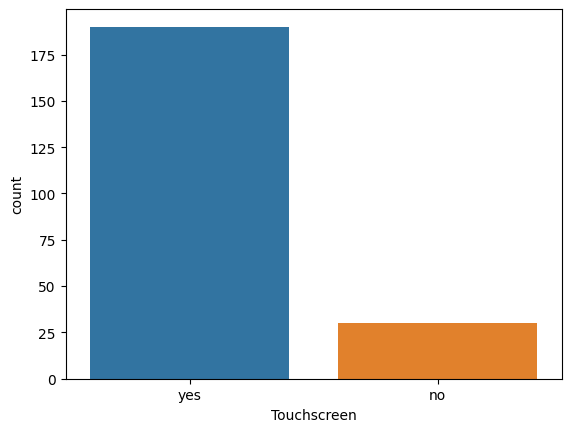

In [ ]:
# Count the number of missing values in the Touchscreen column
missing_values_count_touchscreen = (price['Touchscreen'] == 'missing').sum()
print(f"Number of missing values in Touchscreen: {missing_values_count_touchscreen}")

# Create a count plot to visualize the distribution of Touchscreen values
sns.countplot(data=price, x='Touchscreen')

In [ ]:
# Cool! No missing values
# Create a dictionary to map the values in the 'Touchscreen' column to numerical values
yes_no_encode = {
    'yes': 1,
    'no': 0,
    'missing': -1
}

# Map the values in the 'Touchscreen' column using the dictionary
price['Touchscreen'] = price['Touchscreen'].map(lambda x: yes_no_encode[x])

Number of missing values in Processor Core: 1


<Axes: xlabel='Processor Core', ylabel='count'>

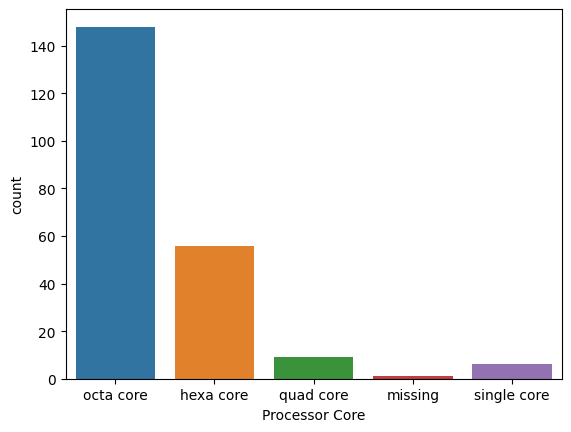

In [ ]:
# Calculate the number of missing values in the 'Processor Core' column
missing_values_count = (price['Processor Core'] == 'missing').sum()
print(f"Number of missing values in Processor Core: {missing_values_count}")

# Create a count plot to visualize the distribution of values in the 'Processor Core' column
sns.countplot(data=price, x='Processor Core')

In [ ]:
# Define the mapping dictionary for encoding processor core values
processor_core_encode = {
    'octa core': 8,
    'quad core': 4,
    'hexa core': 6,
    'single core': 1,
    'missing': -1
}

# Map the values in the 'Processor Core' column using the encoding dictionary
price['Processor Core'] = price['Processor Core'].map(lambda x: processor_core_encode[x])

Number of missing values in Primary Clock Speed: 1


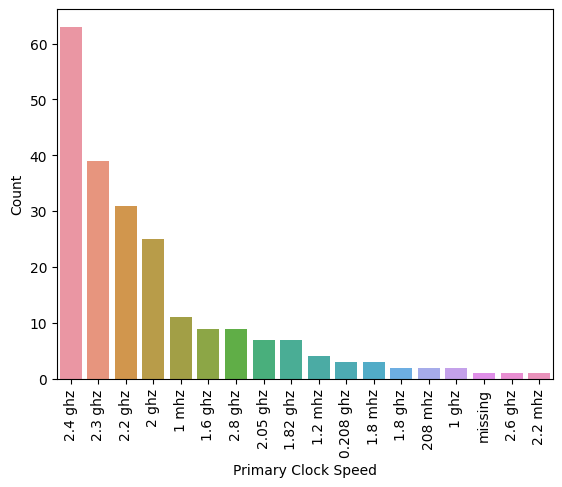

In [ ]:
# Calculate the number of missing values in the 'Primary Clock Speed' column
missing_values_count = (price['Primary Clock Speed'] == 'missing').sum()
print(f"Number of missing values in Primary Clock Speed: {missing_values_count}")

# Count the occurrences of each clock speed value
clock_speed_counts = price['Primary Clock Speed'].value_counts()

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Create a bar plot to visualize the distribution of clock speed values
fig, ax = plt.subplots()
ax = sns.barplot(x=clock_speed_counts.index, y=clock_speed_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Primary Clock Speed')
ax.set_ylabel('Count')

plt.show()

In [ ]:
# Convert eveything to ghz

def clock_speed_to_ghz(clock_speed):
    if clock_speed == 'missing':
        return -1
    if 'ghz' in clock_speed:
        return float(clock_speed.split(' ')[0])
    if 'mhz' in clock_speed:
        return float(clock_speed.split(' ')[0]) / 1000
    return -1

price['Primary Clock Speed'] = price['Primary Clock Speed'].map(clock_speed_to_ghz)

Number of missing values in Internal Storage: 2


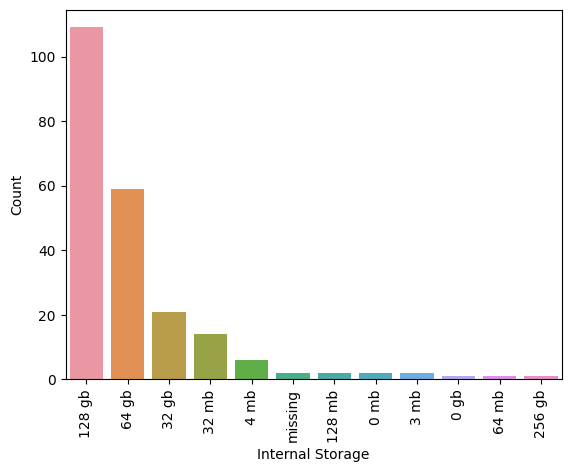

In [ ]:
# Calculate the number of missing values in the 'Internal Storage' column
missing_values_count = (price['Internal Storage'] == 'missing').sum()
print(f"Number of missing values in Internal Storage: {missing_values_count}")

# Count the occurrences of each internal storage value
internal_storage_counts = price['Internal Storage'].value_counts()

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Create a bar plot to visualize the distribution of internal storage values
fig, ax = plt.subplots()
ax = sns.barplot(x=internal_storage_counts.index, y=internal_storage_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Internal Storage')
ax.set_ylabel('Count')

plt.show()

In [ ]:
# Convert eveything to gb
def memory_to_gb(memory):
    if memory== 'missing':
        return -1
    if 'gb' in memory:
        return float(memory.split(' ')[0])
    if 'mb' in memory:
        return float(memory.split(' ')[0]) / 1024
    return -1

price['Internal Storage'] = price['Internal Storage'].map(memory_to_gb)

Number of missing values in RAM: 0


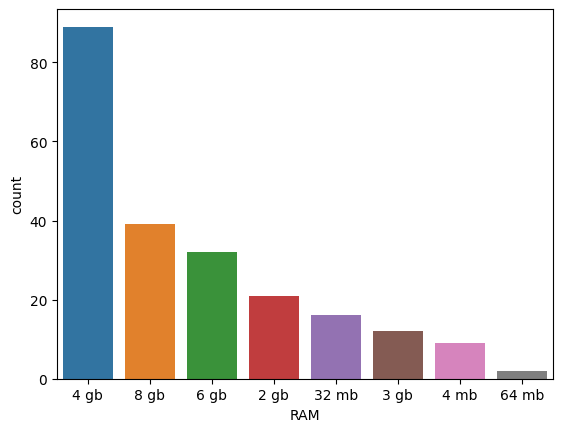

In [ ]:
# Calculate the number of missing values in the 'RAM' column
missing_values_count = (price['RAM'] == 'missing').sum()
print(f"Number of missing values in RAM: {missing_values_count}")

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Create a count plot to visualize the distribution of RAM values
sns.countplot(data=price, x='RAM')

plt.show()

In [ ]:
# Map the 'RAM' column to convert memory values to GB
price['RAM'] = price['RAM'].map(memory_to_gb)

Number of missing values in Bluetooth Support: 24


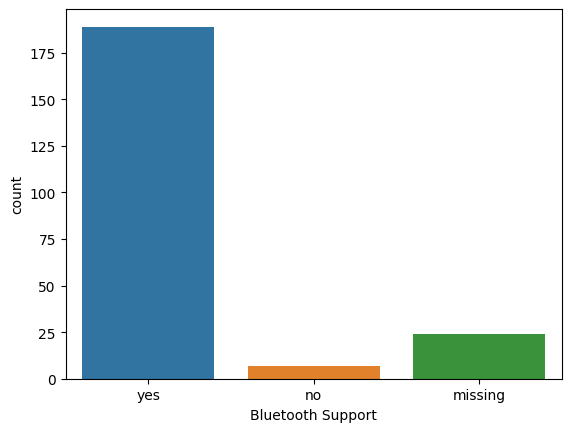

In [ ]:
print(f"Number of missing values in Bluetooth Support: {(price['Bluetooth Support'] == 'missing').sum()}")

# Create a count plot to visualize the distribution of Bluetooth Support values
sns.countplot(data=price, x='Bluetooth Support')

plt.show()

In [ ]:
# Map the values in the 'Bluetooth Support' column to the corresponding encoded values
price['Bluetooth Support'] = price['Bluetooth Support'].map(lambda x: yes_no_encode[x])

Number of missing values in Wi-Fi: 5


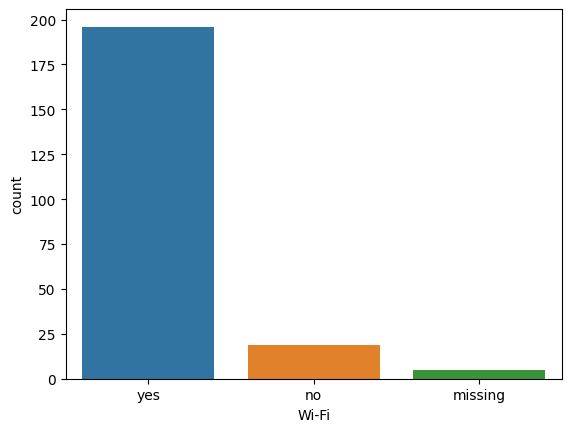

In [ ]:
print(f"Number of missing values in Wi-Fi: {(price['Wi-Fi'] == 'missing').sum()}")

# Create a count plot to visualize the distribution of Wi-Fi values
sns.countplot(data=price, x='Wi-Fi')

plt.show()

In [ ]:
# Map the values in the 'Bluetooth Support' column to the corresponding encoded values
price['Wi-Fi'] = price['Wi-Fi'].map(lambda x: yes_no_encode[x])

Number of missing values in Full HD Recording: 2


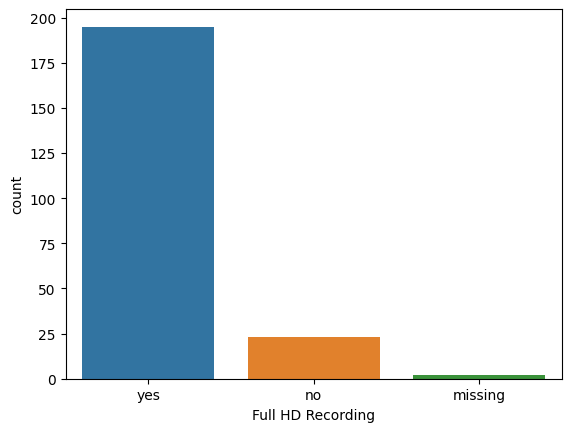

In [ ]:
print(f"Number of missing values in Full HD Recording: {(price['Full HD Recording'] == 'missing').sum()}")

# Create a count plot to visualize the distribution of Full HD Recording values
sns.countplot(data=price, x='Full HD Recording')

plt.show()

In [ ]:
# Map the values in the 'Full HD Recording' column to the corresponding encoded values
price['Full HD Recording'] = price['Full HD Recording'].map(lambda x: yes_no_encode[x])

Number of missing values in Audio Jack: 26


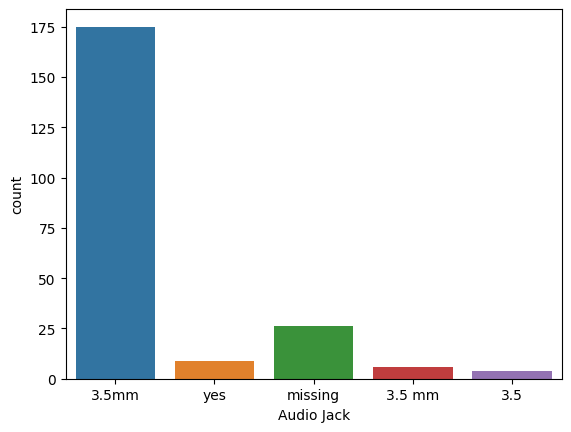

In [ ]:
print(f"Number of missing values in Audio Jack: {(price['Audio Jack'] == 'missing').sum()}")

# Create a count plot to visualize the distribution of Audio Jack values
sns.countplot(data=price, x='Audio Jack')

plt.show()

In [ ]:
# Map the values in the 'Audio Jack' column to the corresponding encoded values
def audio_jack_encode(x):
    if x == 'missing':
        return -1
    elif x == 'no':
        return 0
    else:                    #I conjecture all those with yes also have 3.5 mm because we only have yes 3.5 and missing
        return 1             # Hence, a simple 1, 0 encoding will suffice.
    return -1

price['Audio Jack'] = price['Audio Jack'].map(audio_jack_encode)

Number of missing values in GPS Support: 1


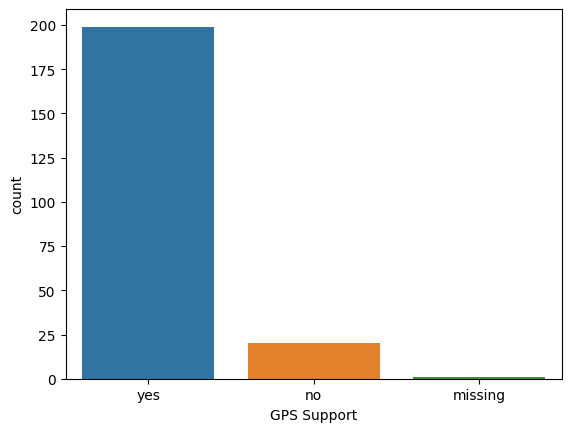

In [ ]:
print(f"Number of missing values in GPS Support: {(price['GPS Support'] == 'missing').sum()}")

# Create a count plot to visualize the distribution of GPS Support values
sns.countplot(data=price, x='GPS Support')

plt.show()

In [ ]:
# Map the values in the 'GPS Support' column to the corresponding encoded values
price['GPS Support'] = price['GPS Support'].map(lambda x: yes_no_encode[x])

Number of missing values in Battery Capacity: 0


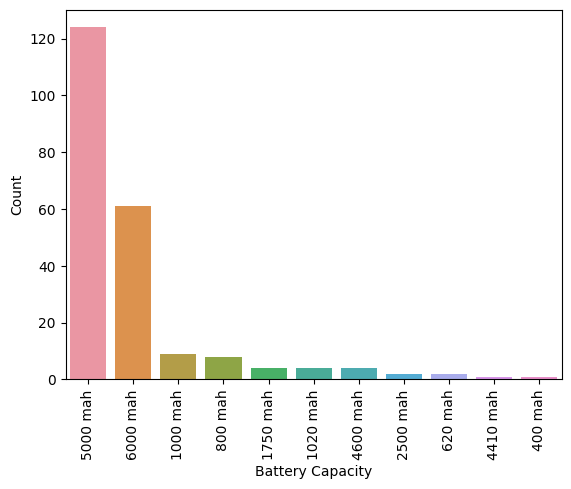

In [ ]:
# Count the number of missing values in the 'Battery Capacity' column
print(f"Number of missing values in Battery Capacity: {(price['Battery Capacity'] == 'missing').sum()}")

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Plot the distribution of battery capacities
battery_capacity_counts = price['Battery Capacity'].value_counts()
fig, ax = plt.subplots()
ax = sns.barplot(x=battery_capacity_counts.index, y=battery_capacity_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Battery Capacity')
ax.set_ylabel('Count')

plt.show()

In [ ]:
# encoder for battery capacity
def bat_cap(battery_capacity):
    if battery_capacity == 'missing':
        return -1
    if 'mah' in battery_capacity:
        return float(battery_capacity.split(' ')[0])
    return -1

In [ ]:
# Map the values in the 'Battery Capacity' column to the corresponding encoded values
price['Battery Capacity'] = price['Battery Capacity'].map(bat_cap)

Number of missing values in Weight: 1


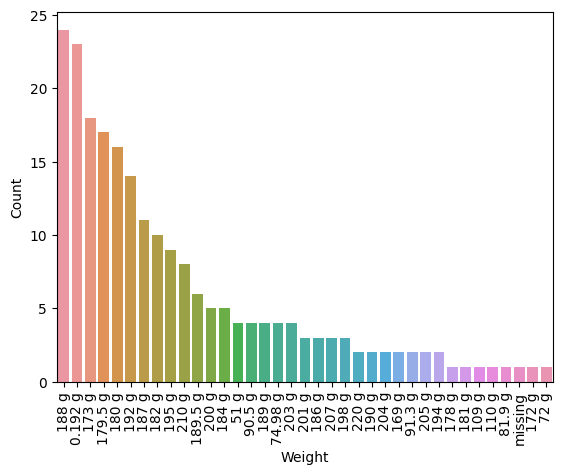

In [ ]:
# Count the number of missing values in the 'Weight' column
print(f"Number of missing values in Weight: {(price['Weight'] == 'missing').sum()}")

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Plot the distribution of weights
weight_counts = price['Weight'].value_counts()
fig, ax = plt.subplots()
ax = sns.barplot(x=weight_counts.index, y=weight_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Weight')
ax.set_ylabel('Count')

plt.show()

In [ ]:
# encoder for weight
def weight(w):
    if w == 'missing':
        return -1
    if 'g' in w:
        return float(w.split(' ')[0])
    return -1

In [ ]:
# Map the values in the 'Weight' column to the corresponding encoded values
price['Weight'] = price['Weight'].map(weight)

Number of missing values in Domestic Warranty: 24


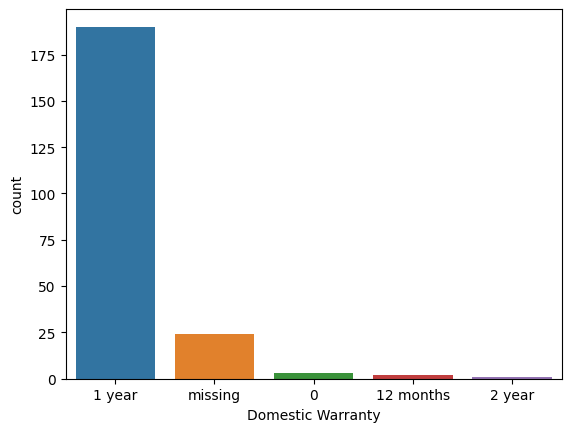

In [ ]:
# Count the number of missing values in the 'Domestic Warranty' column
print(f"Number of missing values in Domestic Warranty: {(price['Domestic Warranty'] == 'missing').sum()}")

# I have choosen countplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Create a count plot to visualize the distribution of Domestic Warranty values
sns.countplot(data=price, x='Domestic Warranty')

plt.show()

In [ ]:
# encoder for domestic warranty
def domestic_warranty_numeric(x):
    if 'year' in x:
        return float(x.split(' ')[0])
    elif 'months' in x:
        return float(x.split(' ')[0]) / 12
    elif 'missing' in x:
        return -1
    else:
        return -1

In [ ]:
# Map the values in the 'Domestic Warranty' column to the corresponding encoded values
price['Domestic Warranty'] = price['Domestic Warranty'].map(domestic_warranty_numeric)

The number of missing values in Display Size: 0


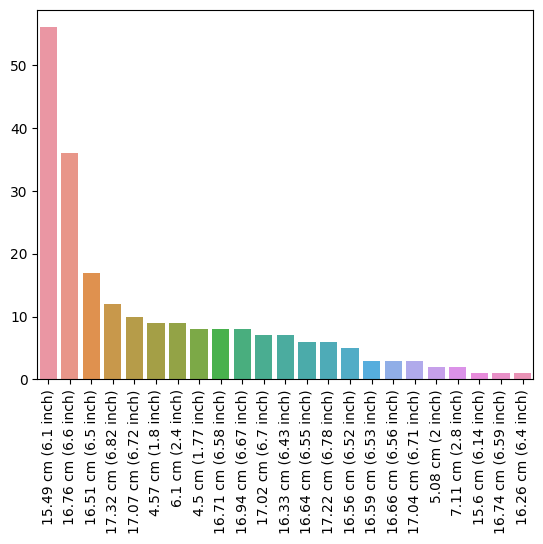

In [ ]:
# Count the number of missing values in the 'Display Size' column
print(f"The number of missing values in Display Size: {(price['Display Size'] == 'missing').sum()}")

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Plot the distribution of display sizes
display_size_counts = price['Display Size'].value_counts()
fig, ax = plt.subplots()
ax = sns.barplot(x=display_size_counts.index, y=display_size_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel='Display Size'
ax.set_ylabel='Count'

plt.show()

In [ ]:
# we don't need both cm and inch
# encoder for display size
def process_display_size(x):
    if x == 'missing':
        return -1
    else :
        return float(x.split(' ')[0])

In [ ]:
# Map the values in the 'Display Size' column to the corresponding encoded values
price['Display Size'] = price['Display Size'].map(process_display_size)

The number of missing values in resolution: 0


[]

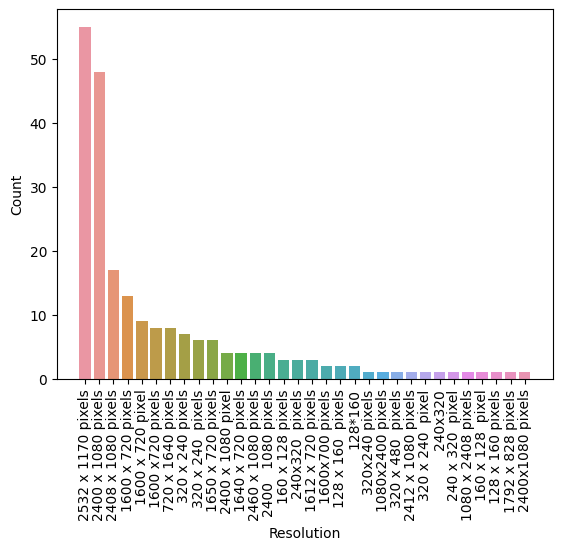

In [ ]:
# Count the number of missing values in the 'Resolution' column
print(f"The number of missing values in resolution: {(price['Resolution'] == 'missing').sum()}")

# I have choosen barplots even for these numeric values because i want to see if there any inconsistencies in the way they are listed
# like quantity (space) unit, quantityunit, etc.

# Plot the distribution of resolutions
resolution_counts = price['Resolution'].value_counts()
fig, ax = plt.subplots()
ax = sns.barplot(x=resolution_counts.index, y=resolution_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Resolution')
ax.set_ylabel('Count')

plt.plot()

In [ ]:
# Will split resolution into resolution_x and resolution_y

def process_resolution(x):
    if x == 'missing':
        return [-1, -1]
    else:
        digits = re.findall(r'\d+', x)
        return [float(dig) for dig in digits]

In [ ]:
# Create new columns for the x and y resolution values
price['Resolution_x'], price['Resolution_y'] = zip(*price['Resolution'].map(process_resolution))
price.pop('Resolution') # remove the original column

0      2408 x 1080 pixels
1      2408 x 1080 pixels
2      2408 x 1080 pixels
3       1650 x 720 pixels
4      2532 x 1170 pixels
              ...        
215    2532 x 1170 pixels
216    2532 x 1170 pixels
217    2532 x 1170 pixels
218    2532 x 1170 pixels
219    2532 x 1170 pixels
Name: Resolution, Length: 220, dtype: object

Number of missing values in Network Type: 0


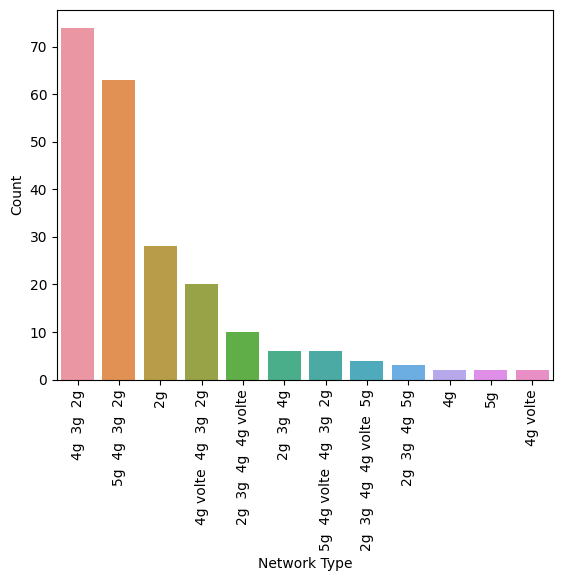

In [ ]:
# Count the number of missing values in the 'Operating System' column
print(f"Number of missing values in Network Type: {(price['Network Type'] == 'missing').sum()}")

# Create a barplot to visualize the distribution of Network Type values
network_type_counts = price['Network Type'].value_counts()
fig, ax = plt.subplots()
ax = sns.barplot(x=network_type_counts.index, y=network_type_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Network Type')
ax.set_ylabel('Count')

plt.show()

In [ ]:
# encoder for network type
def process_network_type(x):
    z = 0.0
    if x == 'missing':
        return -1
    else:
        digits = re.findall(r'\d+', x)
        for dig in digits:
            z += float(dig)
        if 'volte'in x:
            z += 0.1
            z = z - 4 # because 4g is already there
        return z

In [ ]:
# Map the values in the 'Network Type' column to the corresponding encoded values
price['Network Type'] = price['Network Type'].map(process_network_type)

In [ ]:
# Check the number of missing values in the 'Primary Camera' column
print(f"Number of missing values in Primary Camera: {(price['Primary Camera'] == 'missing').sum()}")

# Display the value counts of the 'Primary Camera' column
display(price['Primary Camera'].value_counts())

Number of missing values in Primary Camera: 0


speaker phone                                 40
call wait hold                                24
8mp rear camera                               19
50mp + 8mp + 2mp                              15
0.3mp rear camera                             14
50mp + 2mp                                    13
64mp + 8mp + 2mp                              10
network type                                   9
50mp + 2mp + 2mp                               8
64mp + 2mp                                     6
50mp (ois) + 8mp + 2mp                         6
48mp + 8mp + 2mp                               5
13mp + ai lens                                 5
13mp rear camera                               4
108mp + 2mp                                    4
50mp + 8mp                                     4
1.3mp rear camera                              4
50mp rear camera                               4
50 mp + 2 mp depth lens + ai lens              4
64mp rear camera                               3
50mp + 5mp + 2mp    

In [ ]:
# The description of primary camera follows no format
# I shall therefore only feed the information about its availability
# I will do this using primary camera column and not primary camera available column
# because primary camera available column considers as camera some that I do not
# which shall be made clear by the below function used for encoding
def process_pc(x):
    if x in ['speaker phone', 'call wait hold', 'network type', 'missing']:
        return 0
    else:
        return 1

In [ ]:
# # Map the values in the 'Primary Camera' column to the corresponding encoded values
price['Primary Camera'] = price['Primary Camera'].map(process_pc)

# Remove 'Primary Camera Available' column
price.pop('Primary Camera Available')

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
215    Yes
216    Yes
217    Yes
218    Yes
219    Yes
Name: Primary Camera Available, Length: 220, dtype: object

Number of missing values in Secondary Camera: 1


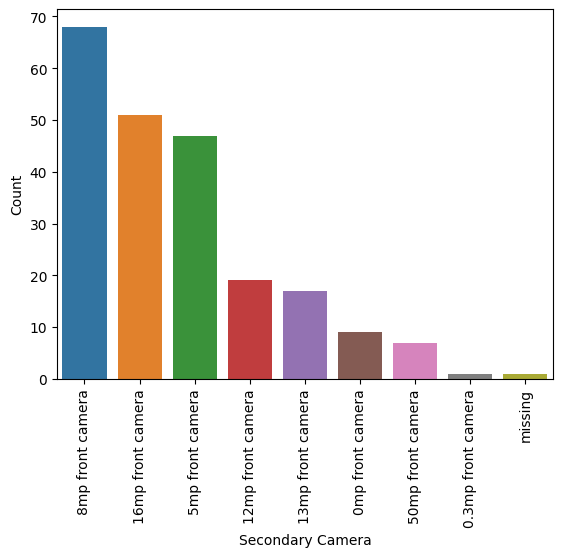

In [ ]:
# Check the number of missing values in the 'Secondary Camera' column
print(f"Number of missing values in Secondary Camera: {(price['Secondary Camera'] == 'missing').sum()}")

# Get the value counts of the 'Secondary Camera' column
secondary_camera_counts = price['Secondary Camera'].value_counts()

# Create a bar plot to visualise distribution
fig, ax = plt.subplots()
ax = sns.barplot(x=secondary_camera_counts.index, y=secondary_camera_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Secondary Camera')
ax.set_ylabel('Count')

plt.show()

In [ ]:
# function to encode secondary camera
def process_sc(x):
    if x == 'missing':
        return 0
    elif '.' in x:
            digits = re.findall(r'\d+', x)
            return float(digits[0]) + float(digits[1]) / 10
    else:
        digits = re.findall(r'\d+', x)
        return float(digits[0])

In [ ]:
# # Map the values in the 'Secondary Camera' column to the corresponding encoded values
price['Secondary Camera'] = price['Secondary Camera'].map(process_sc)

# missing in Secondary Camera column is treated as camera not available
# making secondary camera available column redudant and leading to its removal
price.pop('Secondary Camera Available')

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
215    Yes
216    Yes
217    Yes
218    Yes
219    Yes
Name: Secondary Camera Available, Length: 220, dtype: object

In [ ]:
# Print number of missing values
print(f"Number of missing values in Color: {(price['Color'] == 'missing').sum()}")

# Print value counts
print(price['Color'].value_counts())

# Too many colors some having only a single instance
# I tried grouping them by their RGB values
# But they are hard to find
# Tried using webcolors library but to no avail
# Hence, I find it better to leave them

Number of missing values in Color: 0
blue               23
pink               16
(product)red       11
cool blue          11
aqua sky            8
                   ..
ocean green         1
stardust purple     1
metaverse blue      1
lucent white        1
fantasy purple      1
Name: Color, Length: 89, dtype: int64


In [ ]:
# Before we proceed, lets process price
price["Price"] = price["Price"].str.replace(',', '')
price["Price"] = price["Price"].str[1:].astype(float)

price['Price'] = price.pop('Price')

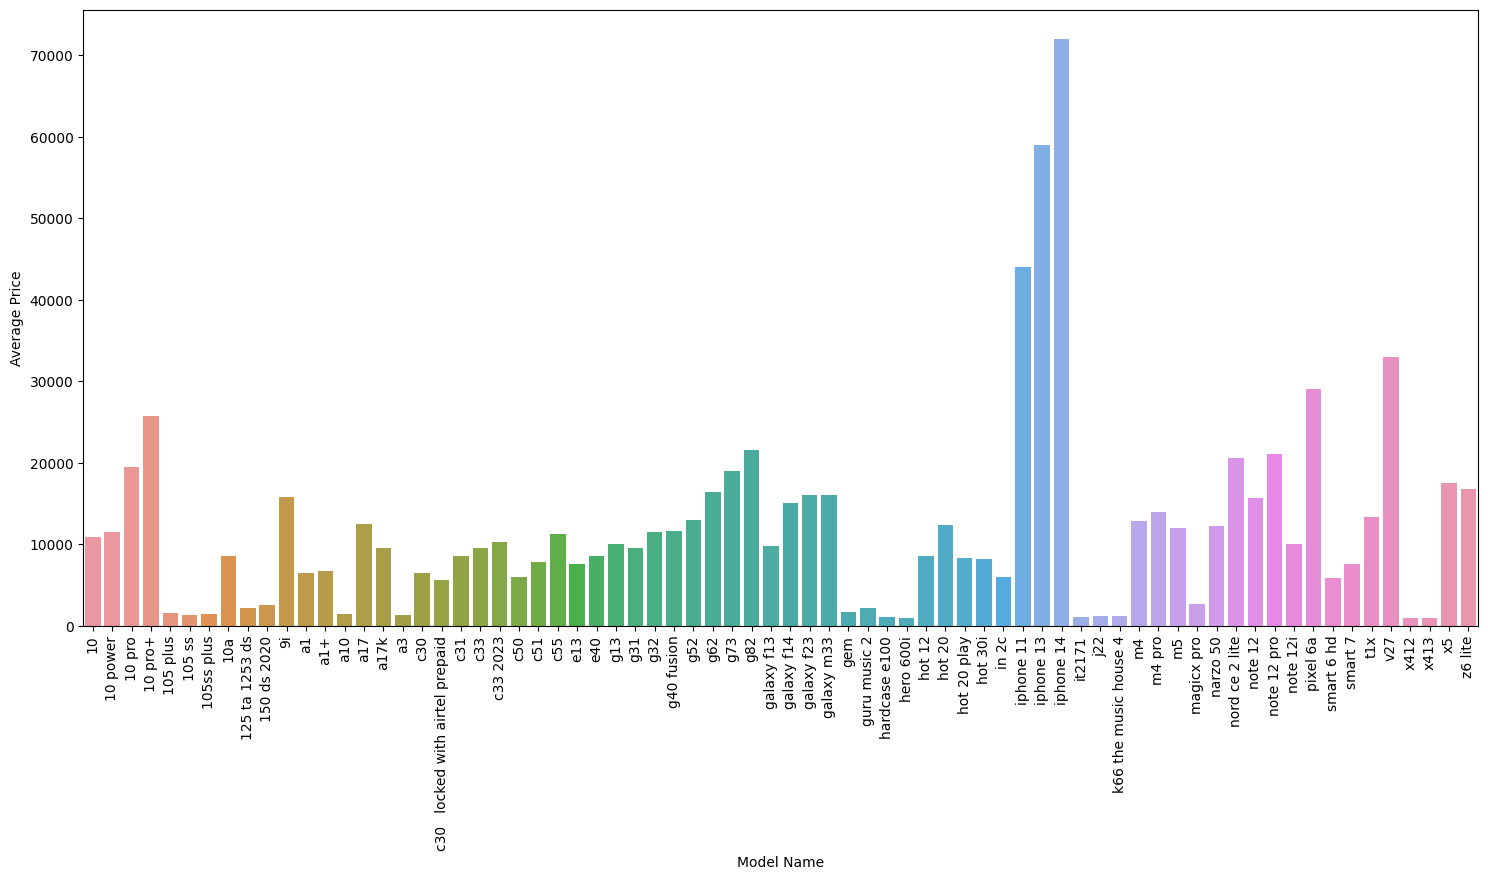

In [ ]:
# As was asked, I shall plot  data of avg price of phone for each model

avg_price_by_model_name_train = price.iloc[:, :].groupby('Model Name')['Price'].mean()

# Plotting average price by model name
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(x=avg_price_by_model_name_train.index, y=avg_price_by_model_name_train.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Model Name')
ax.set_ylabel('Average Price')

plt.show()

In [ ]:
# To deal with os names, compnay names and the rest, it becomes imperative to split the data into train and test
# So as to avoid data leaks
# Because I don't want to do the processing separately for train and test
# And yet I want to avoid data leaks
# I will therefore create train indices

price['Price'] = price.pop('Price') # shift it to the end

train_indices = np.array(train_test_split(price.iloc[:, :-1], price['Price'], test_size=0.2, random_state=42)[0].index)
print(train_indices)

[ 79 217 113 140 122 162 215  38  24 185 137  29  19  69 205  60  68   5
 139  56 156 176 163  65 112 186 155  31  12  35  28  42  84 104 150  51
 124 177  76  41 135  78 178  26 146 173 206   0   2  77  46 153 118  90
  85 147  98  36 125  61  22 144 117  33  11 214 183   6  27 136 211 203
   4  32 119 159 126 158 114  10  62 164 194 181 128 198 167  70 170  64
  44 143  40 123  23 165 161  81  39 184  47  94 168  43 145 152   3 105
  53 133 199 171 204  49  80  34   7 110  91  83 195 200  89   8  13  59
 213 131  17 166  72 192 134 182 208  63  54 107  50 174 216 169  58  48
  88  21  57 160 212 187 191 129  37 157 207   1  52 149 130 151 103  99
 116  87 202  74 121 219  20 188  71 106  14  92 179 102]


In [ ]:
print(f"Number of unique SIM Types: {len(price['SIM Type'].unique())}")

# Frequency distribution of SIM Types
print("SIM Types:")
display(price['SIM Type'].value_counts())

Number of unique SIM Types: 3
SIM Types:


dual sim                 216
single sim                 3
dual sim(nano + esim)      1
Name: SIM Type, dtype: int64

In [ ]:
# There is only one dual sim(nano + esim)
# SIM Type takes discrete values
# I will add it to the training set
# Otherwise, it is just like trying to predict the price of a new device with no idea of how it compares to the existing ones
if 'dual sim(nano + esim)' not in price.loc[train_indices, 'SIM Type'].unique():
    train_indices = np.insert(train_indices, obj=len(train_indices), values=price[price['SIM Type'] == 'dual sim(nano + esim)'].index, axis=0)

# Create a dictionary to map the values in the 'SIM Type' column to numerical values
sim_encode = {
    'single sim': 1,
    'dual sim': 2,
    'dual sim(nano + esim)': 2.4
}

# Map the values in the 'SIM Type' column to the corresponding encoded values
price['SIM Type'] = price['SIM Type'].map(lambda x: sim_encode[x])

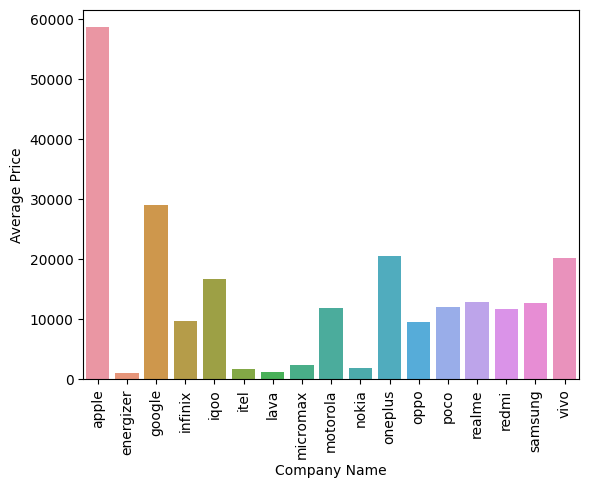

In [ ]:
# Calculate average price by company name for training data
avg_price_by_company_name_train = price.iloc[train_indices, :].groupby('Company Name')['Price'].mean()

# Plotting average price by company name
fig, ax = plt.subplots()
ax = sns.barplot(x=avg_price_by_company_name_train.index, y=avg_price_by_company_name_train.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Company Name')
ax.set_ylabel('Average Price')

plt.show()

# Target encode the 'Company Name' column using smoothing parameter 0.2
tar_company_encoder = ce.TargetEncoder(cols=['Company Name'], smoothing=0.2)
tar_company_encoder.fit(price.loc[train_indices, 'Company Name'], price.loc[train_indices, 'Price'])
price['Company Name'] = tar_company_encoder.transform(price['Company Name'])


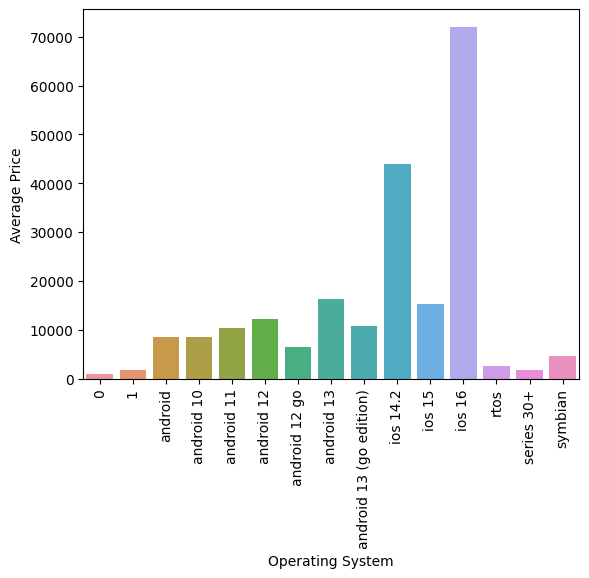

In [ ]:
# Calculate average price by operating system for training data
avg_price_by_os_train = price.iloc[train_indices, :].groupby('Operating System')['Price'].mean()

# Plotting average price by operating system
fig, ax = plt.subplots()
ax = sns.barplot(x=avg_price_by_os_train.index, y=avg_price_by_os_train.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Operating System')
ax.set_ylabel('Average Price')

plt.show()

# Target encode the 'Operating System' column using smoothing parameter 0.2
tar_os_encoder = ce.TargetEncoder(cols=['Operating System'], smoothing=0.2)
tar_os_encoder.fit(price.loc[train_indices, 'Operating System'], price.loc[train_indices, 'Price'])
price['Operating System'] = tar_os_encoder.transform(price['Operating System'])

In [ ]:
# Shift 'Company Name' column
price.insert(2, 'Company Name', price.pop('Company Name'))
price['Price'] = price.pop('Price') # Move 'Price' column to the end

display(price.sample(n=10, random_state=42)) # Display the dataset

,Model Name,Color,Company Name,SIM Type,Touchscreen,Display Size,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating,Resolution_x,Resolution_y,Price
132,g62,frosted blue,11879.359293,2.0,1,16.64,12229.781818,8,2.200,128.00000,8.00000,1,16.0,1,14.0,1,1,1,1,5000.0,184.000,1.0,4.1,3.5,3.9,4.0,4.0,2400.0,1080.0,16999.0
148,105ss plus,red,12321.384181,1.0,0,4.50,12321.384181,8,0.208,0.03125,0.03125,1,0.0,0,2.0,0,0,1,0,1000.0,51.000,1.0,4.0,3.0,3.4,3.5,3.6,160.0,128.0,1401.0
93,iphone 13,blue,12321.384181,2.0,1,15.49,15352.105263,6,2.300,128.00000,4.00000,0,8.0,1,9.0,-1,1,-1,1,6000.0,0.192,-1.0,4.7,4.6,4.4,4.7,4.6,2532.0,1170.0,58999.0
180,iphone 14,midnight,12321.384181,2.4,1,15.49,12321.384181,6,2.300,128.00000,3.00000,1,12.0,1,14.1,1,1,1,1,5000.0,172.000,1.0,4.6,4.6,4.4,4.6,4.6,2532.0,1170.0,71999.0
15,g13,pink,11879.359293,2.0,1,15.49,15352.105263,6,2.400,128.00000,4.00000,0,12.0,1,14.0,1,1,1,1,6000.0,173.000,1.0,4.1,3.7,4.2,4.1,4.6,2532.0,1170.0,9999.0
115,hot 20 play,aqua sky,9680.938058,2.0,1,16.76,10388.315789,4,2.000,32.00000,2.00000,1,5.0,1,9.0,1,1,1,1,5000.0,180.000,1.0,4.4,3.6,4.3,4.0,4.1,1600.0,720.0,8299.0
172,v27,magic blue,12321.384181,2.0,1,17.22,12321.384189,8,2.800,128.00000,8.00000,1,50.0,0,14.0,1,1,1,1,4600.0,180.000,1.0,4.4,4.5,4.1,4.7,4.7,2400.0,1080.0,32999.0
209,iphone 13,(product)red,12321.384181,2.0,1,15.49,15352.105263,6,2.400,128.00000,8.00000,0,16.0,1,14.0,1,1,1,1,5000.0,188.000,1.0,4.7,4.6,4.4,4.7,4.6,2532.0,1170.0,58999.0
75,m4 pro,yellow,12000.923077,2.0,1,16.76,10388.315789,8,2.400,128.00000,8.00000,1,16.0,1,14.0,1,1,1,1,5000.0,195.000,1.0,4.2,3.6,4.0,4.0,4.0,2400.0,1080.0,15999.0
142,x412,black red,12321.384181,2.0,0,4.50,12321.384181,1,0.001,0.03125,0.03125,1,0.0,0,2.0,1,0,1,0,800.0,74.980,-1.0,3.9,2.5,3.5,3.3,3.6,320.0,240.0,932.0


In [ ]:
# Select the features to be used for scaling
features = price.columns[2:-1]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(price.iloc[train_indices, 2:-1])

# Scale the data using the fitted scaler
scaled_data = scaler.transform(price.iloc[:, 2:-1])

# Create dataframes for the scaled data
X = pd.DataFrame(scaled_data, columns=features)
X_train = pd.DataFrame(scaled_data, columns=features).iloc[train_indices, :]
X_test = pd.DataFrame(scaled_data, columns=features).iloc[~train_indices, :]

# Create target variables for training and testing
y_train = price.iloc[train_indices, -1]
y_test = price.iloc[~train_indices, -1]

# Display a sample of the scaled training data and target variable
display(X_train.sample(n=10, random_state=42))
display(y_train.sample(n=10, random_state=42))

,Company Name,SIM Type,Touchscreen,Display Size,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera,Secondary Camera,Full HD Recording,Network Type,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating,Resolution_x,Resolution_y
56,0.000000,0.714286,1.0,1.000000,0.370980,1.000000,0.868421,0.252918,0.499756,1.0,0.16,1.0,0.635714,1.0,1.0,1.0,1.0,1.000000,0.954751,0.666667,0.6,0.782609,0.977273,0.851064,0.872340,0.246256,0.663158
173,0.833721,0.714286,0.0,0.124805,0.389434,1.000000,0.526316,0.004377,0.007328,1.0,1.00,0.5,0.278571,1.0,1.0,1.0,1.0,0.349442,0.819005,0.666667,0.1,0.543478,0.886364,0.765957,0.829787,0.079867,0.049123
174,0.732535,0.714286,1.0,0.922777,0.000000,1.000000,0.802632,0.252918,0.749878,1.0,0.32,1.0,0.635714,1.0,1.0,1.0,1.0,0.814126,0.816742,0.666667,0.5,0.847826,0.931818,0.914894,0.872340,0.945092,0.417544
28,1.000000,0.714286,1.0,0.980499,0.389434,1.000000,0.789474,0.252918,0.749878,1.0,0.16,1.0,0.635714,1.0,1.0,1.0,1.0,0.814126,0.861991,0.666667,0.6,0.847826,0.954545,0.872340,0.936170,0.945092,0.417544
6,0.833721,0.714286,1.0,0.857254,1.000000,0.777778,0.894737,0.501946,0.499756,0.0,0.24,1.0,0.992857,1.0,1.0,1.0,1.0,1.000000,0.787330,0.666667,0.9,1.000000,1.000000,1.000000,0.978723,1.000000,0.457018
68,0.732535,0.714286,1.0,0.952418,0.370980,1.000000,0.842105,0.252918,0.499756,1.0,0.16,1.0,0.992857,1.0,1.0,1.0,1.0,0.814126,0.909502,0.666667,0.4,0.760870,0.886364,0.808511,0.829787,0.945092,0.417544
83,0.833721,0.714286,1.0,0.936817,0.389434,1.000000,0.684211,0.252918,0.249634,0.0,0.10,1.0,0.635714,1.0,1.0,1.0,1.0,0.814126,0.816742,0.666667,0.5,0.826087,0.909091,0.851064,0.851064,0.612313,0.259649
92,0.000000,0.714286,1.0,1.000000,0.000000,1.000000,0.868421,0.252918,0.499756,1.0,0.16,1.0,0.635714,0.0,1.0,0.0,1.0,1.000000,0.005394,0.000000,0.5,0.826087,0.954545,0.872340,0.851064,0.628952,0.259649
133,0.732535,0.714286,1.0,0.922777,0.000000,1.000000,0.802632,0.501946,1.000000,1.0,0.32,1.0,0.635714,1.0,1.0,1.0,1.0,0.814126,0.816742,0.666667,0.5,0.847826,0.909091,0.893617,0.872340,0.945092,0.417544
216,0.833721,0.714286,1.0,0.857254,1.000000,0.777778,0.894737,0.501946,1.000000,0.0,0.32,1.0,0.992857,1.0,1.0,1.0,1.0,0.814126,0.855204,0.666667,0.4,0.804348,1.000000,0.829787,0.787234,1.000000,0.457018


56      8299.0
173     2647.0
174    11999.0
28     11999.0
6      58999.0
68     11999.0
83     15999.0
92      8499.0
133    14999.0
216    14490.0
Name: Price, dtype: float64

In [ ]:
'''
The dataset primarily consists of numeric variables; however, these variables can be considered as discrete values
rather than continuous. For instance, RAM values are typically available in specific increments (e.g., 2GB, 4GB, 8GB),
and it is unlikely to find intermediate values (e.g., 7GB). Therefore, due to the nature of the data and the absence of
continuous ranges, a model based on decision trees, such as the RandomForestRegressor, is a suitable choice. Decision trees
can effectively capture the non-linear relationships between these discrete variables and the target variable.
'''

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=35, random_state=42)

# Fit the model on the scaled training data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=35, random_state=42)

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_all = model.predict(X)

In [ ]:
print(f"Accuracy for test data is: {r2_score(y_test, y_pred_test)}")
print(f"Accuracy for all data is: {r2_score(price.iloc[:, -1], y_pred_all)}")

Accuracy for test data is: 0.9909840064383835
Accuracy for all data is: 0.9901212682886653


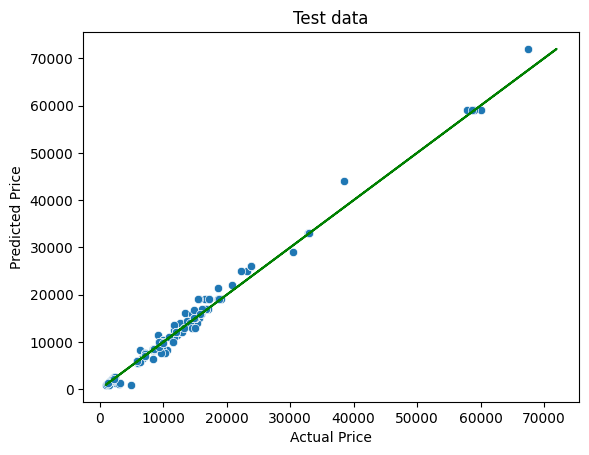

In [ ]:
ax = sns.scatterplot(x=y_pred_test, y=y_test)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Test data')
plt.plot(y_test, y_test, 'g')

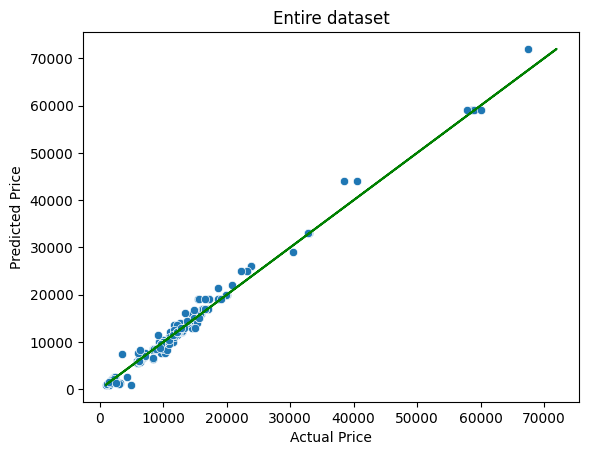

In [ ]:
ax = sns.scatterplot(x=y_pred_all, y=price['Price'])
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Entire dataset')
plt.plot(price['Price'], price['Price'], 'g')